<h1>Topic Analysis</h1>
<li>With lots of web scraping</li>

<h4>In this assignment we’re going to practice topic analysis. Here’s
what you need to do:</h4>
<ol>
<li>From Wikipedia’s List of musicians page (https://en.wikipedia.org/wiki/Lists_of_musicians), pick four lists of
musicians (e.g., List of big band musicians). You can pick any four you like (or the ones I've used below) but make sure that the list has the words “musicians” in it and that the list has at least 30 musicians listed
<li>Collect the urls of all the musicians on those five pages and place them in a list
<li>Grab the content of each musician in the list and place them in a list (of documents)
<li>Build an LDA model using this data (try 5 topics initially but you're welcome to play around with this). 
<li>Identify the topics in the data set. Do this by building a word cloud and by using PyLDAvis (note that you may combine topics generated by the LDA)
<li>Explain your rationale for each topic (briefly, please!)
<li>Now grab another list of musicians from wikipedia and create a new list of documents using the detail from each musicians page. This is your "musician" data set
<li>For each musician in the new list, find the musician in the reference data set that is the closest in similarity. 
<li>Print a table that contains each musician from the musician data set and the most similar musician from the reference data set
</ol>
<h4>Use the code below to build your solution

<p><span style="color:blue">get_musicians</span>: A function that, given a "list of musicians" url, returns a list containing the names of the musicians and the urls for their wikipedia pages
<p>non_musician_finder tries its best to remove links that are not musician links from the page (not perfect, but good enough!)

In [1]:
def get_musicians(url):
    from bs4 import BeautifulSoup
    import requests
    page_soup = BeautifulSoup(requests.get(url).content,'lxml')
    li_tags = page_soup.find_all('li')
    all_musicians = list()
    for tag in li_tags:
        if tag.get('id'):
            continue

        try:
            tag.find('sup',class_="reference")
            link = tag.find('a').get('href')
            name = tag.find('a').get_text()
            if "/wiki/" in link and non_musician_finder(link):
                all_musicians.append((name,"https://en.wikipedia.org" + link))
        except:
            pass
    return all_musicians

def non_musician_finder(link):
    non_musician_words = ['Category','Template','Portal','List','File','Template','Special','Main','Help','User']
    for word in non_musician_words:
        if word in link:
            return False
    return True

<h4>testing the function</h4>
<li>Note that Wikipedia does not have a standard for its page design so this code may not work with every list. If it crashes on your list, use a different musicians list from Wikipedia

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_alternative_country_musicians"
get_musicians(url)

[('16 Horsepower', 'https://en.wikipedia.org/wiki/16_Horsepower'),
 ('Ryan Adams', 'https://en.wikipedia.org/wiki/Ryan_Adams'),
 ('Jill Andrews', 'https://en.wikipedia.org/wiki/Jill_Andrews'),
 ('The Autumn Defense', 'https://en.wikipedia.org/wiki/The_Autumn_Defense'),
 ('Backyard Tire Fire', 'https://en.wikipedia.org/wiki/Backyard_Tire_Fire'),
 ('Del Barber', 'https://en.wikipedia.org/wiki/Del_Barber'),
 ('Eef Barzelay', 'https://en.wikipedia.org/wiki/Eef_Barzelay'),
 ("Bear's Den", 'https://en.wikipedia.org/wiki/Bear%27s_Den_(band)'),
 ('Rico Bell', 'https://en.wikipedia.org/wiki/Rico_Bell'),
 ('Blitzen Trapper', 'https://en.wikipedia.org/wiki/Blitzen_Trapper'),
 ('Blue Rodeo', 'https://en.wikipedia.org/wiki/Blue_Rodeo'),
 ('Bosque Brown', 'https://en.wikipedia.org/wiki/Bosque_Brown'),
 ('The Bottle Rockets', 'https://en.wikipedia.org/wiki/The_Bottle_Rockets'),
 ('BR549', 'https://en.wikipedia.org/wiki/BR549'),
 ('Jim Bryson', 'https://en.wikipedia.org/wiki/Jim_Bryson'),
 ('Richard B

<h4>get_musician_text(url): returns the page text of the wikipedia page associated with a musician</h4>
<li>Since we're not sure if this will always work, we use a try ... except to catch exceptions
<li>If it doesn't work, the function returns None
<li>We will need to delete this (musician, url) pair from our musicians list

In [3]:
def get_musician_text(url):
    from bs4 import BeautifulSoup
    import requests
    all_text = ''
    try:
        page_soup = BeautifulSoup(requests.get(url).content,'lxml')
        for p_tag in page_soup.find_all('p'):
            all_text += p_tag.get_text()
    except:
        return None
    return all_text


<h4>testing get_musician_text</h4>

In [4]:
url = "https://en.wikipedia.org/wiki/Jim_Morrison"
get_musician_text(url)

'\n\nJames Douglas Morrison (December 8, 1943 – July 3, 1971) was an American singer, songwriter and poet, who served as the lead vocalist of the rock band the Doors. Due to his poetic lyrics, distinctive baritone voice, wild personality, unpredictable and erratic performances, and the dramatic circumstances surrounding his life and early death, Morrison is regarded by music critics and fans as one of the most iconic and influential frontmen in rock history. Since his death, his fame has endured as one of popular culture\'s most rebellious and oft-displayed icons, representing the generation gap and youth counterculture.[2]\nTogether with Ray Manzarek, Morrison co-founded the Doors during the summer of 1965 in Venice, California. The band spent two years in obscurity until shooting to prominence with their number-one single in the United States, "Light My Fire," taken from their self-titled debut album. Morrison wrote or co-wrote many of the Doors\' songs, including "Light My Fire", "B

<p><span style="color:blue">get_all_musicians</span>: A function that, given a list of genres, returns a list containing the names of the musicians and the urls for their wikipedia pages associated with that list of genres
<p>The function should return a list of (name,url) pairs for all the musicians in the list of genres
<p>You need to:
<ol>
<li>iterate through the list of genres
<li>initialize a list "all_musicians"
<li>construct a url for the list of musicians (I've done these first three steps for you)
<li>call get_musicians for that url
<li>extend all_musicians by what get_musicians returns

In [5]:
def get_all_musicians(genre_list):
    all_musicians = list()
    for genre in genre_list:
        url = 'https://en.wikipedia.org/wiki/List_of_' + genre
        musicians = get_musicians(url)
        all_musicians.extend(musicians)
    
    return all_musicians

<h4>Example of how to use get_all_musicians</h4>

In [6]:
genre_list = ['bluegrass_musicians#G','British_blues_musicians','country_blues_musicians','emo_artists']
all_musicians = get_all_musicians(genre_list)
all_musicians 

[('Tom Adams', 'https://en.wikipedia.org/wiki/Tom_Adams_(bluegrass_musician)'),
 ('Eddie Adcock', 'https://en.wikipedia.org/wiki/Eddie_Adcock'),
 ('David "Stringbean" Akeman',
  'https://en.wikipedia.org/wiki/David_%22Stringbean%22_Akeman'),
 ('Red Allen', 'https://en.wikipedia.org/wiki/Red_Allen_(bluegrass)'),
 ('Darol Anger', 'https://en.wikipedia.org/wiki/Darol_Anger'),
 ('Mike Auldridge', 'https://en.wikipedia.org/wiki/Mike_Auldridge'),
 ('Kenny Baker (fiddler)',
  'https://en.wikipedia.org/wiki/Kenny_Baker_(fiddler)'),
 ('Jessie Baker', 'https://en.wikipedia.org/wiki/Jessie_Baker'),
 ('Butch Baldassari', 'https://en.wikipedia.org/wiki/Butch_Baldassari'),
 ('Russ Barenberg', 'https://en.wikipedia.org/wiki/Russ_Barenberg'),
 ('Byron Berline', 'https://en.wikipedia.org/wiki/Byron_Berline'),
 ('Norman Blake',
  'https://en.wikipedia.org/wiki/Norman_Blake_(American_musician)'),
 ('Kathy Boyd', 'https://en.wikipedia.org/wiki/Kathy_Boyd_and_Phoenix_Rising'),
 ('Dale Ann Bradley', 'https:

<p><span style="color:blue">get_all_musician_docs</span>: A function that, given the list of (musician,url) pairs, returns two lists, a list of musicians and a parallel (same size) list of documents. 

<p>You need to:

<ol>
<li>initialize the two lists

<li>iterate through the all_musicians list
<li>extract the name and the url of the musician
<li>get the text using the get_musician_text() function
<li>if the function returns None, ignore it and move to the next musician
<li>otherwise, append the name ot the musician_names list and the text to the musician_texts list
<li>return musician_names and musician_texts


In [7]:
def get_all_musician_docs(all_musicians):
    musician_names = list()
    musician_texts = list()
    i=0
    for musician in all_musicians:
        name = musician[0]
        url = musician[1]
        text = get_musician_text(url)
        if text == None:
            continue
        else:
            musician_names.append(name)
            musician_texts.append(text)
    
    return musician_names,musician_texts
        

<h4>Example of how to use get_all_musician_docs</h4>

In [8]:
reference_names,reference_docs = get_all_musician_docs(all_musicians)

<h3>Set up the LDA model</h3>
<li>reference_docs is the list of documents
<li>clean the documents (sentence tokenize and remove \n's) 
<li>construct texts, dictionary, and corpus (see class iPython notebook)
<li>construct an LDA model. Use 5 topics initially but you should play around with this number

In [9]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
from nltk import sent_tokenize

In [10]:
from nltk import sent_tokenize
for i in range(len(reference_docs)):
    reference = reference_docs[i]
    sents = sent_tokenize(reference)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    reference_docs[i] = '. '.join(sents)

In [11]:
texts = [[word for word in reference.lower().split()
        if word not in STOPWORDS and word.isalnum() and not word.lower() == 'slate']
        for reference in reference_docs]


In [12]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [13]:
num_topics = 5
passes = 10
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

<h2>Draw word clouds for the topics</h2>
<li>Do the word clouds show some topic differences?</li>
<li>Briefly analyze the word clouds</li>

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from random import shuffle

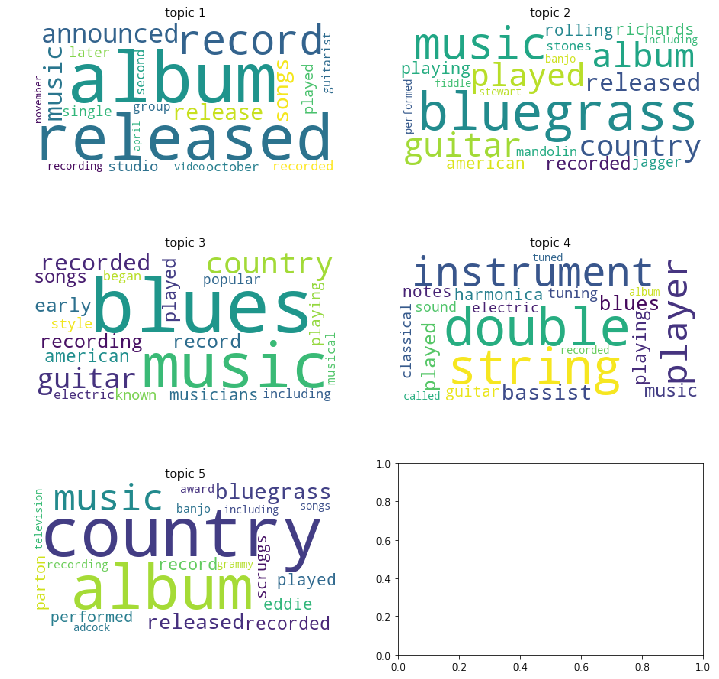

In [15]:
COL_NUM = 2
ROW_NUM = 3
min_size = 5
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,5):
    word_list=[]
    prob_total = 0
    for word,prob in lda.show_topic(i,topn=50):
        prob_total +=prob
    for word,prob in lda.show_topic(i,topn=50):
        if word in STOPWORDS or  len(word) < min_size:
            continue
        freq = int(prob/prob_total*1000)
        alist=[word]
        word_list.extend(alist*freq)
        shuffle(word_list)
        text = ' '.join(word_list)
        wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',max_words=20).generate(text)
        ax = axes[i//2, i%2] 
        ax.set_title("topic " + str(i+1))
        ax.imshow(wordcloud)
        ax.axis('off')
plt.show()

<h2>A (brief!) analysis of the word clouds goes here</h2>
<li>The most common words in topic 1 are: released, music, album, record, and fleetwood so this general topic may have to do with Fleetwood Mac, a British blues band.</li>
<li>The most common words in topic 2 are: music, bluegrass, string, and instrument, so this general topic may have to do with Bluegrass music and its instrumentation</li>
<li>The most common words in topic 3 are: released and album, so this general topic may have to do the release of new albums</li>
<li>The most common words in topic 4 are: blues, record, recorded, and recording, so this general topic may have to do with recording Blues music</li>
<li>The most common words in topic 5 are: blues, country, guitar, music, recorded, and album, so this general topic may have to do with country and blues music and the fact that they both have guitars in them</li>
<li>Overall, the different topics seem to all share certain similar important words like recorded, blues, music, album, and released.</li>

<h2>Use PyLDAvis to analyze topics</h2>
<li>Are the topics separated (i.e., are there 5 distinct topics or fewer?)
<li>Analyze the topics adjusting lambda, looking at the top few words, and assigning meaning to the topics

In [16]:
import pyLDAvis.gensim

In [17]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\iawol\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


<h2>A brief description of the topics and any rationale goes here</h2>
<li>We see that relatively speaking, topics 1 and 5 share some similarities. This also holds for topics 4 and 5. Topic 2 appears to be completely different from the others, and this is shown when selecting topic 2, as the most relevant terms for this topic are almost entirely in topic 2 and not in topics 1, 3, 4, or 5.</li>
<li>We also see that topics 3 and 5 comprise over 60% of the tokens, meaning that these topics have a higher number of the most common words</li>
<li>Unsurprisingly, the most common words overall are band, released, album, and music. This makes a lot of sense because we are gathering our information from Wikipedia and it describes things about each band/artist, which typically has to do with their history, when they released their albums, and the kind of music they made</li>

<h2>Get a new set of musicians for the similarity analysis</h2>
<li>prepare the data and find the most similar musician from the original corpus for each musician in this new set

In [18]:
#get the (names,docs) pair for a new list of musicians here
genre = ['progressive_rock_artists']
new_musicians = get_all_musicians(genre)
new_reference_names,new_reference_docs = get_all_musician_docs(new_musicians)

In [19]:
import numpy as np
from gensim.similarities import MatrixSimilarity

In [20]:
#Do the similarity analysis here
#make a list of (new_musician, most_similar_musician) pairs

similar_artists = list()
for i in range(len(new_reference_docs)):
    corpus_new = dictionary.doc2bow(new_reference_docs[i].lower().split())
    index = MatrixSimilarity(lda[corpus])
    new_topic_dist = lda[corpus_new]
    sims = index[new_topic_dist]
    similar_artists.append((new_reference_names[i], reference_names[np.argmax(sims)]))

In [21]:
import pprint

In [22]:
#Write code to do a formatted print of the list here
pp = pprint.PrettyPrinter(indent=5)
pp.pprint(similar_artists)

[    ('21st Century Schizoid Band', 'Elliott'),
     ("5uu's", 'Penny Nichols'),
     ('10cc', 'The Birds'),
     ('Acqua Fragile', 'Joanne Shaw Taylor'),
     ('A.C.T', 'Ida'),
     ('Aeon Zen', 'Chris Farlowe'),
     ('After Crying', 'Blue note'),
     ('Agitation Free', 'Climax Blues Band'),
     ('Air', 'Joanne Shaw Taylor'),
     ('Aisles', 'Ida'),
     ('Ajalon', 'Hawthorne Heights'),
     ('Jan Akkerman', 'Wizz Jones'),
     ('Alamaailman Vasarat', 'Jerry Garcia'),
     ('The Alan Parsons Project', 'Penny Nichols'),
     ('Also Eden', 'Shawn Lane'),
     ('Alux Nahual', 'Jack Bruce'),
     ('Ambrosia', 'Penny Nichols'),
     ('Amon Duul II', 'Joanne Shaw Taylor'),
     ('Analogy', 'Joanne Shaw Taylor'),
     ('Anathema', 'I Am Ghost'),
     ('And So I Watch You From Afar', 'Hey Mercedes'),
     ('Animals as Leaders', 'Ten Years After'),
     ('...And You Will Know Us by the Trail of Dead', 'Buckethead'),
     ('Ian Anderson', 'Snowy White'),
     ('Jon Anderson', 'Penny Nichols'